In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [15]:
len(mis_keep)

448

In [13]:
fdr_cut = 0.05

bleh = pd.read_csv("LSN_Reinf.txt", sep = '\t')

sig_all = signed_lfsr[(signed_lfsr["Max"] > -np.log10(fdr_cut))].sort_values("Max")

mis = bleh.copy()
mis_keep = list(set(list(mis["1"])))
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr.index, mis_keep + list(sig_all.index)))
print(fdr_cut, fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]]), [[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])


0.05 SignificanceResult(statistic=0.4089837858220211, pvalue=0.33602289509016137) [[2, 408], [104, 8677]]


In [2]:
df = pd.read_csv("Effects_WithV_PerGene_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.75_Thresh2.txt", sep = "\t")
lfsr = pd.read_csv("Lfsr_WithV_PerGene_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.75_Thresh2.txt", sep = "\t")

signed_lfsr = np.sign(df.sort_index())*-np.log10(lfsr.sort_index())
signed_lfsr["Mean"] = np.mean(signed_lfsr, axis = 1)

signed_lfsr["Max"] = np.max(signed_lfsr, axis = 1)
signed_lfsr["Min"] = np.min(signed_lfsr, axis = 1)

sig_pos_select = signed_lfsr[signed_lfsr["Max"] > -np.log10(0.05)].sort_values("Max")
sig_pos_select["Variance"] = np.var(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)/np.mean(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)


In [12]:
for fdr_cut in [0.01, 0.05, 0.1]:
    for daf in [0.99, 0.995, 0.999]:
        

        sig_all = signed_lfsr[(signed_lfsr["Max"] > -np.log10(fdr_cut))].sort_values("Max")

        mis = pd.read_csv("Missense_Neanderthal.csv")
        mis = mis[mis["human_DAF"] > daf]
        mis_keep = list(mis["Gene name"])
        mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
        mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr.index))
        nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
        nmis_nsig = len(np.setdiff1d(signed_lfsr.index, mis_keep + list(sig_all.index)))
        print(fdr_cut, daf, fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]]), [[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])


0.01 0.99 SignificanceResult(statistic=4.751572327044025, pvalue=0.1996544667739255) [[1, 106], [18, 9066]]
0.01 0.995 SignificanceResult(statistic=6.01058201058201, pvalue=0.16197458116519228) [[1, 84], [18, 9088]]
0.01 0.999 SignificanceResult(statistic=10.135555555555555, pvalue=0.10041953427263091) [[1, 50], [18, 9122]]
0.05 0.99 SignificanceResult(statistic=4.359833042127742, pvalue=0.007787797196617557) [[5, 102], [101, 8983]]
0.05 0.995 SignificanceResult(statistic=5.57240099009901, pvalue=0.0029315014106212718) [[5, 80], [101, 9005]]
0.05 0.999 SignificanceResult(statistic=7.541093032957864, pvalue=0.0027548655083665117) [[4, 47], [102, 9038]]
0.1 0.99 SignificanceResult(statistic=3.642886597938144, pvalue=0.0008694047094352808) [[10, 97], [250, 8834]]
0.1 0.995 SignificanceResult(statistic=4.177762633675823, pvalue=0.0006361928808500181) [[9, 76], [251, 8855]]
0.1 0.999 SignificanceResult(statistic=5.588303988501617, pvalue=0.0005339861840220845) [[7, 44], [253, 8887]]


In [14]:
fdr_cut = 0.05
daf = 0.999

sig_all = signed_lfsr[(signed_lfsr["Max"] > -np.log10(fdr_cut))].sort_values("Max")

mis = pd.read_csv("Missense_Neanderthal.csv")
mis = mis[mis["human_DAF"] > daf]
mis_keep = list(mis["Gene name"])
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr.index, mis_keep + list(sig_all.index)))
print(fdr_cut, daf, fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]]), [[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])

np.intersect1d(mis_keep, sig_all.index)

0.05 0.999 SignificanceResult(statistic=7.541093032957864, pvalue=0.0027548655083665117) [[4, 47], [102, 9038]]


array(['ADSL', 'KIF26B', 'TMPRSS2', 'TNRC18'], dtype=object)

In [16]:
mis[mis["Gene_name"].isin(["TMPRSS2"])]

,POS,human_DAF,Gene_name,REF,ALT,CAnc,Altai_GT,Altai_filt,Altai_allele,Vindija_GT,...,SIFT,PolyPhen,other_feature,Thkg_subset,ExAC_allele,ExAC_freq,Capture_info,Arch_freq,Arch_filter,Gene name
43,21:42866423,0.99981,TMPRSS2,A,G,G,1.0,1,G,1.0,...,tolerated(1);tolerated_low_confidence(1),benign(0);benign(0.001),NaN,AFR_MAF=G:0|AMR_MAF=G:0|EAS_MAF=G:0.003|EUR_MA...,G,0.000173,"VE:G,1,1;SE:G,0,1;V21:G,1,1;S21:G,1,1",0.0,0.0,TMPRSS2


In [275]:
np.intersect1d(mis_keep, sig_all.index)

array(['ADSL', 'KIF26B', 'RAB35', 'SLC32A1', 'SMUG1', 'TMPRSS2', 'TNRC18',
       'TTLL10', 'VCAM1', 'ZNF292'], dtype=object)

In [5]:
sig_all = signed_lfsr[(signed_lfsr["Max"] > -np.log10(0.05)) | (signed_lfsr["Min"] < np.log10(0.05))].sort_values("Max")

mis = pd.read_csv("Missense_Neanderthal.csv")
mis = mis[mis["human_DAF"] > 0.999]
mis_keep = list(mis["Gene name"])
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr.index, mis_keep + list(sig_all.index)))
fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])

SignificanceResult(statistic=2.8390243902439023, pvalue=0.02671141554059449)

In [64]:
np.intersect1d(mis_keep, sig_all.index)

array(['GBP5', 'GPR143', 'MAST4', 'MYH3', 'NOVA1', 'SLC2A10', 'SLITRK1',
       'TPO', 'ZNF185'], dtype=object)

In [63]:
sig_all = signed_lfsr[(signed_lfsr["Min"] < np.log10(0.1))].sort_values("Max")

mis = pd.read_csv("Missense_Neanderthal.csv")
mis = mis[mis["human_DAF"] > 0.99]
mis_keep = list(mis["Gene name"])
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr.index, mis_keep + list(sig_all.index)))
fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])

SignificanceResult(statistic=1.2515527950310559, pvalue=0.44543292659628014)

In [77]:
signed_lfsr

,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,NeuralFemale,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP,Mean,Max,Min
1-Dec,-0.709182,-0.703549,-0.691670,-0.706874,-0.706617,-0.706993,-0.706961,-0.709099,-0.703480,-0.701529,...,-0.702624,-0.705336,-0.701299,-0.702671,-0.703859,-0.705704,-0.698987,-0.698929,-0.592709,-0.711039
1-Mar,-0.397612,-0.383244,-0.386490,-0.389100,-0.396906,-0.395296,-0.397099,-0.394762,-0.384005,-0.388996,...,-0.386743,-0.396089,-0.393639,-0.390043,-0.392234,-0.394812,-0.388881,-0.389015,-0.311897,-0.401130
10-Mar,0.703089,0.696880,0.698725,0.703219,0.700683,0.703944,0.701910,0.707985,0.700504,0.704291,...,0.701410,0.708324,0.696107,0.700939,0.704136,0.699985,0.705892,0.697609,0.708324,0.568576
10-Sep,0.391487,0.387757,0.388732,0.393215,0.392605,0.389028,0.389538,0.393939,0.389807,0.393585,...,0.390353,0.390734,0.388575,0.388593,0.388748,0.388956,0.392086,0.389393,0.393939,0.363718
11-Mar,-0.566400,-0.565371,-0.560506,-0.568906,-0.565132,-0.567277,-0.566814,-0.564866,-0.562961,-0.567091,...,-0.567049,-0.569017,-0.565543,-0.565834,-0.567131,-0.568636,-0.563731,-0.561577,-0.439690,-0.571131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,-0.407999,-0.409018,-0.396907,-0.408858,-0.406524,-0.405340,-0.405752,-0.407796,-0.405507,-0.405356,...,-0.404525,-0.409387,-0.404369,-0.403220,-0.408438,-0.403906,-0.407713,-0.404434,-0.348411,-0.409387
ZXDC,-0.440376,-0.438069,-0.436437,-0.438499,-0.439392,-0.439287,-0.439555,-0.441550,-0.435003,-0.437871,...,-0.440769,-0.444494,-0.437880,-0.439271,-0.439840,-0.440364,-0.437056,-0.437106,-0.371705,-0.444494
ZYG11A,-1.010116,-0.996995,-0.989751,-0.999173,-1.004272,-0.994386,-0.989117,-1.012734,-0.984477,-0.994922,...,-1.003016,-1.001318,-1.003424,-0.998657,-1.000047,-0.987354,-0.988166,-0.993943,-0.886683,-1.012734
ZYG11B,-0.320925,-0.328968,-0.324602,-0.322387,-0.319138,-0.322620,-0.324184,-0.320731,-0.323958,-0.324115,...,-0.324583,-0.323245,-0.323379,-0.324489,-0.322664,-0.322263,-0.320261,-0.324865,-0.319138,-0.353557


In [63]:
v = pd.read_csv("../Myriad_RNA/CM_Filtered.txt", sep = "\t").set_index("gene")
v = v[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
v.columns = ["L2FC CM", "padj CM", "pvalue CM"]
vv = pd.read_csv("../Myriad_RNA/PP_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC PP", "padj PP", "pvalue PP"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/RPE_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC RPE", "padj RPE", "pvalue RPE"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/SKM_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC SKM", "padj SKM", "pvalue SKM"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/HP_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC HP", "padj HP", "pvalue HP"]
v = v.join(vv).dropna()

vv = pd.read_csv("../Myriad_RNA/MN_Filtered.txt", sep = "\t").set_index("gene")
vv = vv[["L2FC Chpreffed", "padj Chpreffed", "pvalue Chpreffed"]]
vv.columns = ["L2FC MN", "padj MN", "pvalue MN"]
v = v.join(vv).dropna()
v["Var"] = np.var(v[["L2FC MN", "L2FC HP", "L2FC CM", "L2FC RPE", "L2FC SKM", "L2FC HP"]], axis = 1)/np.sum(np.abs(v[["L2FC MN", "L2FC HP", "L2FC CM", "L2FC RPE", "L2FC SKM", "L2FC HP"]]), axis = 1)

v_dif = v[v["padj RPE"] < 0.05]

signed_lfsr_use = signed_lfsr.loc[np.intersect1d(v.index, signed_lfsr.index)]
v_dif_use = v_dif.loc[np.intersect1d(v_dif.index, signed_lfsr.index)]
sig_all = signed_lfsr_use[(signed_lfsr_use["Max"] > -np.log10(0.05))].sort_values("Max")

mis_keep = list(v_dif_use.index)
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr_use.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr_use.index, mis_keep + list(sig_all.index)))
print(fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]]))
print([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])

SignificanceResult(statistic=0.7933037934620428, pvalue=0.3543461569011812)
[[27, 2602], [51, 3899]]


In [156]:


ra = pd.read_csv("../Prime_DB_Expression/Agoglia_Fraser_2021/STAR/Hybrid_chpr/Agoglia_Fraser_2021_DESeq2_HumChp_Hybrid_CS_D150_chpr.txt", sep = "\t")
ra = ra.dropna().set_index("Gene")
ra_dif = ra[ra["padj"] < 0.05]

signed_lfsr_use = signed_lfsr.loc[np.intersect1d(ra.index, signed_lfsr.index)]
ra_dif_use = ra_dif.loc[np.intersect1d(ra_dif.index, signed_lfsr.index)]
sig_all = signed_lfsr_use[(signed_lfsr_use["Max"] > -np.log10(0.05))].sort_values("Max")

mis_keep = list(ra_dif_use.index)
mis_sig = len(np.intersect1d(mis_keep, sig_all.index))
mis_nsig = len(np.intersect1d(np.setdiff1d(mis_keep, sig_all.index), signed_lfsr_use.index))
nmis_sig = len(np.setdiff1d(sig_all.index, mis_keep))
nmis_nsig = len(np.setdiff1d(signed_lfsr_use.index, mis_keep + list(sig_all.index)))
print(fisher_exact([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]]))
print([[mis_sig, mis_nsig], [nmis_sig, nmis_nsig]])

SignificanceResult(statistic=0.6467105263157895, pvalue=0.1370398250085879)
[[14, 1330], [96, 5898]]


In [157]:
ra_dif.loc[np.intersect1d(ra_dif.index, sig_all.index)].sort_values("log2FoldChange")

,log2FoldChange,pvalue,padj,padj_mine
Gene,,,,
CLDN11,-2.667693,2.233456e-06,4.465441e-05,6.519043e-05
ACTA2,-1.066415,2.138327e-13,1.832494e-11,2.675237e-11
C5orf38,-0.890438,3.559748e-06,6.767023e-05,9.879096e-05
ZNF701,-0.877343,7.918785e-05,1.005570e-03,1.468019e-03
RPL39,-0.754829,4.004746e-04,3.975379e-03,5.803608e-03
TIMM21,-0.626038,7.987171e-05,1.010685e-03,1.475487e-03
PLEKHF1,-0.534263,3.673252e-03,2.430499e-02,3.548256e-02
PARP1,-0.400851,1.914339e-05,2.991578e-04,4.367368e-04
GNA12,-0.367610,1.648492e-04,1.871550e-03,2.732253e-03


In [231]:
df = pd.read_csv("Effects_WithV_TFBS_Prop0.6_Strong0.01_Thresh3_Cutoff500.txt", sep = "\t")
lfsr = pd.read_csv("Lfsr_WithV_TFBS_Prop0.7_Strong0.01_Thresh3_Cutoff500.txt", sep = "\t")

signed_lfsr = np.sign(df.sort_index())*-np.log10(lfsr.sort_index())
signed_lfsr["Mean"] = np.mean(signed_lfsr, axis = 1)

signed_lfsr["Max"] = np.max(signed_lfsr, axis = 1)
signed_lfsr["Min"] = np.min(signed_lfsr, axis = 1)

sig_pos_select = signed_lfsr[signed_lfsr["Max"] > -np.log10(0.0125)].sort_values("Max")
sig_pos_select["Variance"] = np.var(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)/np.mean(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)
sig_pos_select.tail(50)

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP,Mean,Max,Min,Variance
MA0746.2_SP3,1.087407,1.375141,1.257336,1.226675,1.297289,1.296994,1.380399,1.236446,1.248527,1.329958,...,1.112332,1.039479,0.991304,1.367025,1.412994,1.301034,1.223837,1.977019,0.929312,0.029185
MA0784.2_POU1F1,-6.843647,-0.708266,-2.134969,-2.849636,-5.323936,-0.371044,-0.928052,-1.455418,0.460421,0.491786,...,-5.130781,-3.570840,-0.413434,-1.863574,-0.350454,-0.677588,-2.115715,2.014828,-8.882509,-3.844423
MA1515.1_KLF2,0.755315,0.846109,0.400249,0.639748,1.432353,0.539595,0.985047,-0.627638,0.570339,0.925640,...,0.445809,0.302331,-0.588510,0.383850,1.048247,-0.449457,0.421790,2.023651,-0.995594,1.224401
MA0745.2_SNAI2,-0.665777,-0.287848,-1.164695,-0.551858,-0.326447,0.513369,0.821724,-1.071859,-0.452856,-0.512524,...,-0.843190,0.411877,-0.584640,0.462213,0.738176,0.549911,-0.005874,2.043034,-1.164695,-90.639945
MA0592.3_ESRRA,1.329547,0.485818,1.028567,0.482895,1.292548,-0.381485,0.596464,0.467004,-0.632852,-2.452146,...,-0.792395,2.103404,-1.194653,1.911880,0.524872,0.414164,0.310369,2.103404,-2.452146,3.122325
MA1114.1_PBX3,0.571331,0.366052,-1.161751,-1.950846,0.431495,-0.344418,0.598602,-0.714006,0.761975,0.743270,...,0.643824,0.389859,0.722495,-0.540192,-0.493182,-0.322083,0.044752,2.149239,-1.950846,17.810709
MA0740.2_KLF14,1.991768,1.951559,1.804465,1.995426,2.134374,1.963536,1.776092,1.944992,1.740988,1.757495,...,1.992558,1.697821,1.075830,2.116191,2.054725,1.977639,1.784329,2.162765,0.506462,0.086746
MA0512.2_Rxra,-0.000806,-0.000769,-0.000969,2.212413,-0.000745,-0.000811,-0.000931,0.000862,0.000749,0.000919,...,-0.000851,-0.000836,0.000813,0.000944,0.000893,-0.000964,0.065074,2.212413,-0.000969,2.147234
MA1564.1_SP9,1.651200,1.965253,1.803793,1.925134,1.880264,1.902630,1.975844,1.882988,1.907260,1.920378,...,1.601077,1.809696,1.811914,1.823451,1.996726,1.961379,1.886649,2.301792,1.584757,0.008972
MA1527.1_NFIC,0.960858,1.225034,1.341699,1.044473,0.940837,1.240324,0.759365,1.346693,1.222808,1.286972,...,0.771104,1.244083,1.003949,1.305417,1.196300,1.334827,1.125208,2.558095,-0.619904,0.177879


In [2]:
df = pd.read_csv("Effects_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")
lfsr = pd.read_csv("Lfsr_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")

signed_lfsr = np.sign(df.sort_index())*-np.log10(lfsr.sort_index())
signed_lfsr["Mean"] = np.mean(signed_lfsr, axis = 1)

signed_lfsr["Max"] = np.max(signed_lfsr, axis = 1)
signed_lfsr["Min"] = np.min(signed_lfsr, axis = 1)

sig_pos_select = signed_lfsr[signed_lfsr["Max"] > -np.log10(0.05)].sort_values("Max")
sig_pos_select["Variance"] = np.var(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)/np.mean(sig_pos_select.drop(["Mean", "Max", "Min"], axis = 1), axis = 1)
sig_pos_select

,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP,Mean,Max,Min,Variance
MA0680.2_Pax7,0.986327,1.182498,0.941967,1.086880,1.306904,0.728735,0.766203,0.981885,1.253054,1.198719,...,0.802828,0.863590,0.932831,0.629310,0.771887,0.987345,0.990659,1.306904,0.629310,0.028353
MA0605.2_ATF3,0.761210,0.690417,0.909790,1.272820,0.665597,0.449709,0.523316,0.553439,1.054862,0.386122,...,0.879138,0.911008,1.108370,0.826918,0.835313,0.403484,0.841454,1.315671,0.386122,0.088738
MA0838.1_CEBPG,0.804259,1.016590,1.202587,0.792307,1.277703,0.871257,0.783680,0.566441,1.052573,0.583740,...,0.706807,0.812730,-0.383352,0.638773,0.306251,0.620678,0.824391,1.327690,-0.383352,0.118234
MA0596.1_SREBF2,0.825769,1.032411,0.562731,0.976995,0.973900,0.761578,0.572941,0.664478,0.876714,1.048347,...,0.541925,1.096228,0.986964,0.960861,1.190282,0.938625,0.938492,1.373743,0.357448,0.055641
MA1535.1_NR2C1,0.449018,-0.665095,-0.390267,1.398348,0.690808,0.668521,0.880441,0.424638,0.388626,-0.313318,...,0.316234,-0.303232,-0.520073,-0.664463,-0.321847,0.654854,0.321914,1.398348,-0.665095,1.003634
MA0844.1_XBP1,0.939563,0.474618,0.982138,1.402521,1.150794,0.805148,0.859816,0.967208,0.848437,0.636722,...,0.897991,0.808540,0.800622,0.354956,0.782443,0.996747,0.804733,1.402521,0.354956,0.063308
MA0859.1_Rarg,0.618639,0.418412,0.711814,1.123639,1.405945,1.096022,0.555221,0.583644,1.131339,0.454626,...,0.400435,0.811860,0.440797,0.547838,0.731951,0.793021,0.724066,1.405945,-0.291852,0.162705
MA0069.1_PAX6,-0.504598,1.030297,0.324405,0.790785,-0.325663,0.938709,0.525216,0.502874,0.881851,0.910123,...,-0.298958,0.872768,1.218807,0.765149,0.693344,0.664592,0.646752,1.454659,-0.504598,0.307242
MA1965.1_SP5,0.435142,1.333369,1.234414,1.089750,0.405233,0.952254,-0.601792,-0.367857,1.330702,0.957628,...,0.761678,1.242177,0.894200,1.304438,0.325076,-0.296744,0.731943,1.476422,-0.601792,0.511839
MA0855.1_RXRB,-1.193238,-0.524692,-0.513192,0.882859,-0.467082,0.587686,-0.336167,-0.411949,0.412364,-0.454675,...,-1.620593,0.461395,0.700909,0.616026,0.563621,-1.238910,-0.250216,1.542659,-1.876970,-2.631409


In [5]:
10**(-5.266295)

5.416328544769589e-06

C:\Users\astar\AppData\Local\Temp\ipykernel_20664\1869865358.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] > -np.log10(0.05):


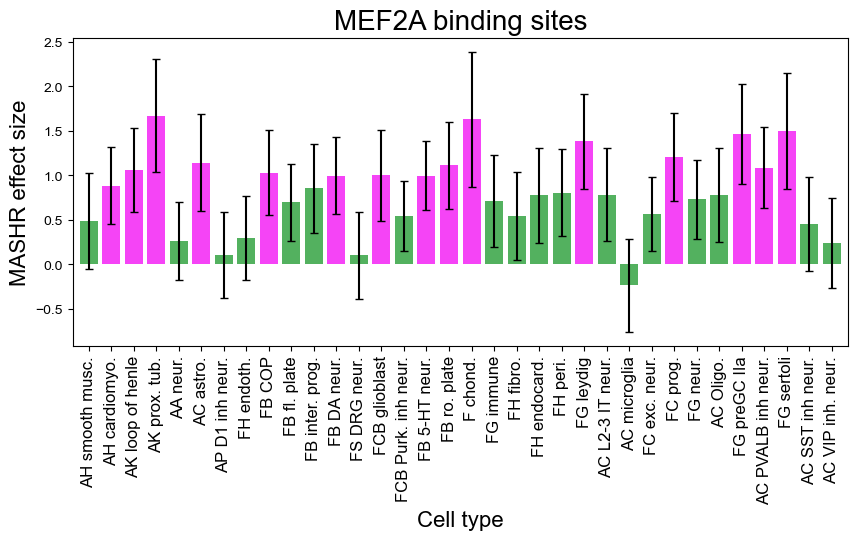

In [67]:
to_plot = "MA0112.3_ESR1"

sig = pd.DataFrame(sig_pos_select.loc[to_plot])

colors = []
for index, row in sig.iterrows():
    if row[0] > -np.log10(0.05):
        colors.append("#F42FF5")
    else:
        colors.append("#40A94D")
    if len(colors) == 34:
        break

psd = pd.read_csv("Psd_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")
eff = pd.read_csv("Effects_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")

categories = [d_abrev[x] for x in list(eff.columns)]
values = list(eff.loc[to_plot])
std_dev = [x for x in list(psd.loc[to_plot])]
# Create the bar plot
fig, ax = plt.subplots(figsize = (10, 4))
bars = ax.bar(categories, values, yerr=std_dev, capsize=3, color=colors, alpha=0.9)

# Add labels and title
ax.set_ylabel('MASHR effect size', size = 16)
ax.set_title('MEF2A binding sites', size = 20)
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation = 90, size = 12)
ax.set_xlabel("Cell type", size = 16)
ax.set_xlim([-0.7, 33.7])
# Show the plot
plt.show()

In [29]:
sig_pos_select.to_csv("Bleh3.csv")

In [30]:
sig_pos_select = sig_pos_select.loc[nd]
x = pd.DataFrame(np.median(sig_pos_select, axis = 0))
x.index = sig_pos_select.columns
x.sort_values(0)

,0
Min,-0.604054
FetalGonadImmuneFemale,-0.038435
Variance,0.148235
OGC,0.358334
D1Pu,0.390755
FetalBrainNeurDRG_2,0.488463
KosoyRoussosControlMicroglia,0.493137
FetalBrainNeurSerotonergic,0.519578
VIP,0.522753
AdultHeartSmoothMuscle,0.523643


In [15]:
nuclear_drivers = ["PPARD", "VDR", "RXRA", "NR2F1", "RORB", "RARB", "NR5A1", "RARG", "NR2F6"]
nd = ["MA0512.2_Rxra", "MA0112.3_ESR1", "MA1531.1_NR1D1", "MA0595.1_SREBF1", "MA0066.1_PPARG", "MA0258.2_ESR2", "MA0677.1_Nr2f6", "MA0855.1_RXRB", "MA0859.1_Rarg", "MA1535.1_NR2C1"]
len(nd)

10

In [2]:
tfs = ["ZNF460", "NFIB", "ZNF135", "SNAI2", "MEF2A", "KLF2", "LHX3", "POU3F1", "RXRA", "JDP2", "YY2", "ESR1", "NR1D1",\
      "BACH2", "POU2F2", "POU3F2", "NRF1", "SREBF1", "POU5F1", "SNAI1", "ESR2", "PPARG", "SNAI3", "ZNF684", "CREB3L4",\
      "NR2F6", "RXRB", "SP5", "PAX6", "RARG", "XBP1", "NR2C1", "SREBF2", "CEBPG", "ATF3", "PAX7"]

In [3]:
#d_all = {0.10:6836, 0.20:3614, 0.30:2434, 0.40:1736, 0.50:1494, 0.60:1243, 0.70:1001, 0.80:1081}
v, yvalls = read_missense(path = "./", maf_cut = 0.1)
yvalls = unfold_missense(yvalls)

v = v[v["Gene"].isin(tfs)]
yvalls = yvalls[yvalls["Gene"].isin(tfs)]

(29874, 12)
(29720, 12)
(29720, 12)
(29720, 12)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]


In [13]:
tfs_new = ["NFIB", "SNAI2", "MEF2A", "KLF2", "LHX3", "POU3F1", "RXRA", "JDP2", "ESR1", "NR1D1",\
      "BACH2", "POU3F2", "NRF1", "SREBF1", "POU5F1", "SNAI1", "ESR2", "PPARG", "SNAI3", "CREB3L4",\
      "NR2F6", "RXRB", "SP5", "PAX6", "RARG", "XBP1", "NR2C1", "SREBF2", "CEBPG", "ATF3", "PAX7"]


In [16]:
hum = pd.read_csv("HumChp_Mis_Final.bed", sep = "\t").drop_duplicates("Position")
chp = pd.read_csv("HumChp_Mis_Final_ChpDer.bed", sep = "\t").drop_duplicates("Position")
hum_tf = hum[hum["Gene"].isin(tfs)]
chp_tf = chp[chp["Gene"].isin(tfs)]

fisher_exact([[hum_tf.shape[0], hum.shape[0] - hum_tf.shape[0]], [chp_tf.shape[0], chp.shape[0] - chp_tf.shape[0]]])

SignificanceResult(statistic=0.9285474857660022, pvalue=0.7431218864523422)

,Position,Gene,MskHumPhyloP,MskHBCGOPhyloP,SpeciesSupport,470MammalPhastCons,AminoAcidChange,PolyPhen,SIFT
352,chr1:18735993,PAX7,1.184000,1.176000,237,0,S/L,tolerated_low_confidence(1),NaN
755,chr1:40541687,ZNF684,-0.363000,-0.371000,192,0.008,A/V,tolerated(0.08),benign(0)
756,chr1:40544432,ZNF684,-0.597000,0.288000,22,0,A/T,tolerated(0.13),possibly_damaging(0.494)
757,chr1:40546931,ZNF684,-0.396000,-0.406000,212,0,A/V,tolerated(0.65),benign(0.251)
758,chr1:40547307,ZNF684,-0.358000,-0.365000,226,0,S/R,tolerated(0.43),benign(0.001)
7302,chr12:95025247,NR2C1,8.693000,8.670000,236,1,S/G,tolerated_low_confidence(1),benign(0)
8836,chr14:64257296,ESR2,1.254000,1.242000,240,0.991,M/V,tolerated(0.88),benign(0.009)
8837,chr14:64282717,ESR2,8.792000,8.769000,241,1,V/A,tolerated(1),benign(0)
10130,chr15:99712449,MEF2A,2.919000,2.906000,235,1,S/N,tolerated_low_confidence(1),benign(0.001)
11483,chr16:88681411,SNAI3,0.067000,0.201000,230,0.001,T/I,tolerated(0.34),benign(0)


In [17]:
ttest_ind(hum_tf["MskHBCGOPhyloP"].astype(float), chp_tf["MskHBCGOPhyloP"].astype(float))

TtestResult(statistic=1.7192937599186977, pvalue=0.08938030936922876, df=81.0)

In [ ]:
x = pd.read_csv("HumChp_Mis_Final_ChpDer.bed", sep = "\t")
x = x[x["Gene"].isin(tfs)]

In [31]:
x = pd.read_csv("PerGene_Unfold_Permute/PhyloP447/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut0.csv.gz")
x = x[x["Proportion"] == 0.9]
x = x.sort_values("Fisher exact p-value; alt greater")
x[x["Gene"].isin(tfs)]

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
3645,ESR1,1.381,214,0.828,66,0.744313,0.028081,0.397478,0.014040,0.209518,3.083,"[[26, 188], [6, 60]]","[[26, 188], [7, 59]]",0.9
4628,POU3F2,1.689,379,1.380,92,0.926150,0.211572,0.502607,0.105786,0.075718,4.281,"[[42, 337], [9, 83]]","[[42, 337], [10, 82]]",0.9
4831,NFIB,1.547,556,1.606,163,0.941649,0.994354,0.573738,0.502994,-0.005723,3.683,"[[56, 500], [16, 147]]","[[56, 500], [17, 146]]",0.9
1305,SP5,1.206,142,1.338,58,0.269904,0.598639,0.928665,0.299320,-1.022341,4.378,"[[7, 135], [5, 53]]","[[7, 135], [6, 52]]",0.9
1046,POU3F1,1.699,225,1.787,56,0.223124,0.880942,0.946568,0.560254,-1.120927,6.212,"[[11, 214], [5, 51]]","[[11, 214], [6, 50]]",0.9


In [24]:
from scipy.stats import ttest_ind
mwu(v["MskHBCGOPhyloP"].astype(float), x["MskHBCGOPhyloP"].astype(float))

MannwhitneyuResult(statistic=988.0, pvalue=0.24924210100296185)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.5277777777777778,
 4.695068136272545,
 [4.695068136272545, 13.596400000000001],
 'dc > 0.1, likely stable',
 [[9, 17], [2, 8]],
 <Figure size 1000x600 with 1 Axes>)

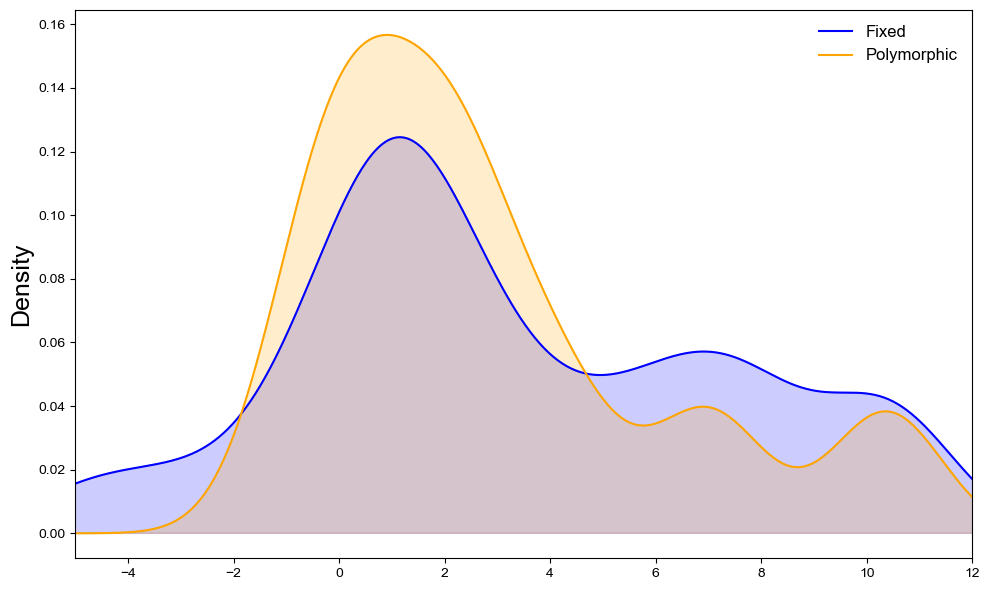

In [12]:
tfs_new = ["NFIB", "SNAI2", "MEF2A", "KLF2", "LHX3", "POU3F1", "RXRA", "JDP2", "ESR1", "NR1D1",\
      "BACH2", "POU3F2", "NRF1", "SREBF1", "POU5F1", "SNAI1", "ESR2", "PPARG", "SNAI3", "CREB3L4",\
      "NR2F6", "RXRB", "SP5", "PAX6", "RARG", "XBP1", "NR2C1", "SREBF2", "CEBPG", "ATF3", "PAX7"]

v = v[v["Gene"].isin(tfs_new)]
yvalls = yvalls[yvalls["Gene"].isin(tfs_new)]

vvv = prepare_alpha(v, yvalls, stat = "PhyloP447")
compute_alpha_new(vvv, plot = True)

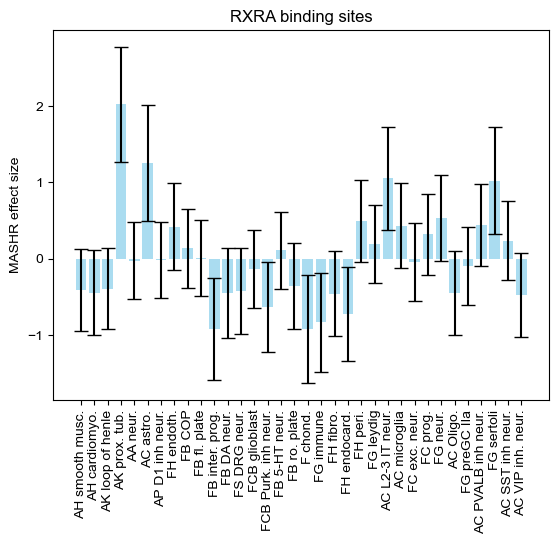

In [39]:
to_plot = "MA0512.2_Rxra"

psd = pd.read_csv("Psd_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")
eff = pd.read_csv("Effects_WithV_TFBS_FilterNewTEs_SigThresh0.025_Prop0.6_Strong0.25_Thresh2_Cutoff500.txt", sep = "\t")

categories = [d_abrev[x] for x in list(eff.columns)]
values = list(eff.loc[to_plot])
std_dev = [x**0.5 for x in list(psd.loc[to_plot])]
# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(categories, values, yerr=std_dev, capsize=5, color='skyblue', alpha=0.7)

# Add labels and title
ax.set_ylabel('MASHR effect size')
ax.set_title('RXRA binding sites')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation = 90)

# Show the plot
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'AdultHeartSmoothMuscle'),
  Text(1, 0, 'AdultHeartVentricularCardiomyocyte'),
  Text(2, 0, 'AdultLoopOfHenle'),
  Text(3, 0, 'AdultProximalTubule'),
  Text(4, 0, 'AMY'),
  Text(5, 0, 'ASCT'),
  Text(6, 0, 'D1Pu'),
  Text(7, 0, 'FetalArterialECs'),
  Text(8, 0, 'FetalBrainCOP'),
  Text(9, 0, 'FetalBrainFloorPlate'),
  Text(10, 0, 'FetalBrainNeurCB_GNP_IPC_1'),
  Text(11, 0, 'FetalBrainNeurDAergic'),
  Text(12, 0, 'FetalBrainNeurDRG_2'),
  Text(13, 0, 'FetalBrainNeurGlioblast_CB_VZ'),
  Text(14, 0, 'FetalBrainNeurPurkinje_6'),
  Text(15, 0, 'FetalBrainNeurSerotonergic'),
  Text(16, 0, 'FetalBrainRoofPlate'),
  Text(17, 0, 'FetalChondrocytes'),
  Text(18, 0, 'FetalGonadImmuneFemale'),
  Text(19, 0, 'FetalHeartCardiacFibroblasts'),
  Text(20, 0, 'FetalHeartEndocardium'),
  Text(21, 0,

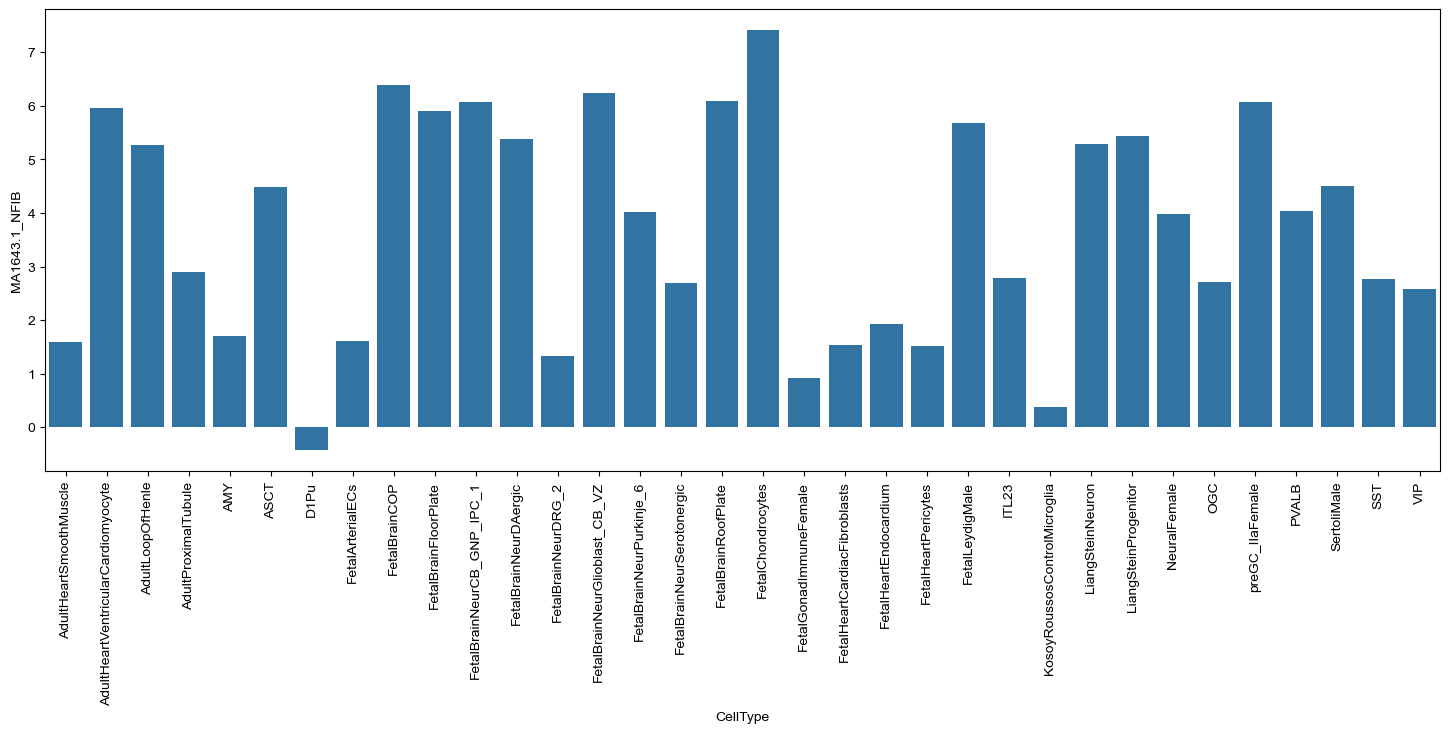

In [5]:
tf = "MA1643.1_NFIB"
dfp = pd.DataFrame(signed_lfsr.drop(["Max", "Min", "Mean"], axis = 1).loc[tf].T)
dfp["CellType"] = dfp.index
fig, ax = plt.subplots(figsize = (18, 6))
sns.barplot(data = dfp, x = "CellType", y = tf)
plt.xticks(rotation=90)

In [78]:
x = pd.read_csv("TFBS_Results/FetalChondrocytes/TFBS_SpecSup0_PS_PhastCons-1_Unpaired_MAFCut0.25_TEST_FetalChondrocytes_AbsLogfc_HrefDneCrefOnly_All.txt.gz", sep = "\t")
x = x[x["Proportion"] == 0.7]
x[x["TF_Name"].isin(["SNAI2"])]

,TF_JASPAR_ID,TF_Name,Cutoff,Statistic,Median fixed abs logfc,Number fixed variants,Median polymorphic abs logfc,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff.1,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
4572,MA0745.2,SNAI2,300,abs logfc,0.034076,658274,0.033009,61920,1.264185e-09,1.392007e-10,6.328456e-10,6.960033e-11,0.054008,0.060681,"[[205236, 453038], [18575, 43345]]","[[205236, 453038], [18576, 43344]]",0.7
4577,MA0745.2,SNAI2,400,abs logfc,0.041661,123080,0.039019,11939,4.696441e-06,9.256778e-06,2.401291e-06,4.628389e-06,0.090866,0.075110,"[[39430, 83650], [3581, 8358]]","[[39430, 83650], [3582, 8357]]",0.7
4582,MA0745.2,SNAI2,500,abs logfc,0.037739,21867,0.034745,2357,1.295313e-03,5.861535e-03,6.627146e-04,2.930767e-03,0.140573,0.065194,"[[7280, 14587], [707, 1650]]","[[7280, 14587], [708, 1649]]",0.7


In [13]:
df2 = pd.read_csv("Input_ZScore_PerGene_MASH_Proportion0.7.txt", sep = "\t").set_index("Gene")
df2_sig = df2.loc[sig_pos_select.index]
df2_sig

,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,KosoyRoussosControlMicroglia,LiangSteinNeuron,LiangSteinProgenitor,NeuralFemale,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP
C3orf17,-0.188246,-0.124323,1.069018,0.483851,0.062350,0.243596,-1.041554,0.364252,1.523868,0.837032,...,-0.505092,1.183340,0.000000,0.782730,-0.375353,1.066958,1.864209,0.306019,1.361799,1.411912
CCZ1,-0.079956,0.847122,1.579144,1.579144,1.291536,0.389812,-0.404364,1.579144,1.733399,0.542142,...,0.235435,1.436263,0.079099,0.762125,2.643107,2.643107,0.692347,1.291536,1.642413,1.878453
PTCHD2,1.460564,2.623733,1.699644,0.970947,0.792342,1.460564,1.354323,0.792693,0.507316,0.363375,...,0.758403,0.146029,-0.408361,0.400396,1.423544,2.383020,1.111954,1.806482,0.615938,0.472413
SLC17A5,1.637198,0.658102,0.254960,-0.470228,1.000315,0.356817,0.954506,1.637198,1.249462,0.954506,...,-1.228774,1.541506,3.060266,1.541506,1.731816,0.153559,0.254960,1.345656,1.345656,1.926178
OR6B1,0.297521,1.302035,1.383817,0.877929,2.135124,1.994292,1.302035,1.302035,1.579076,0.076005,...,1.936734,1.720241,0.957793,2.549062,1.241075,1.159695,1.097071,1.383817,1.662374,1.383817
TIMM21,0.906359,0.906359,1.972641,0.107958,1.113164,1.262337,1.628391,1.829248,0.000000,0.484556,...,1.569202,0.377511,1.321000,0.849293,0.590718,1.113164,0.590718,1.569202,1.113164,-0.054609
CAPN9,1.304929,0.372967,2.111361,2.208598,1.808603,-0.271022,1.610882,1.204141,3.094482,0.372967,...,1.510460,1.304929,1.409111,0.791847,1.610882,0.688367,0.894400,0.479005,0.479005,1.913545
ZNRF4,2.440878,0.123646,0.368775,0.408285,1.440264,2.178776,1.751097,1.247961,1.559629,1.089497,...,2.025679,2.712766,1.673381,1.870441,1.827082,1.404479,2.484853,0.730084,1.247961,1.168929
DNAJB6,-0.237778,1.770518,2.368022,1.976822,0.364537,0.385600,-0.281162,2.059110,2.734897,3.480932,...,2.141269,2.141269,2.468653,2.059110,1.770518,-0.107909,0.364537,0.662247,-0.894495,0.640609
FOXL2,2.397081,0.662887,1.233517,1.614562,2.083624,0.168821,1.614562,0.256051,0.423279,1.142720,...,2.712598,2.336693,0.983945,1.300616,0.662887,1.707655,1.233517,2.397081,0.913538,-0.265166


In [93]:
x = pd.read_csv("Finalizing_HPO_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv")
x = x[x["Proportion"].isin([0.7])]
x["FDR"] = fdrcorrection(x["Fisher exact p-value; alt greater"])[1]
x = x.sort_values("FDR")
x

,Term,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,FDR
3,Abnormality of the hip bone,-0.0560,17547,-0.0840,4661,0.000096,0.001174,0.000048,0.000587,0.130247,0.251,"[[5787, 11760], [1396, 3265]]","[[5795, 11752], [1400, 3261]]",0.7,0.078472
32,Increased circulating total IgE level,0.0830,4152,-0.0070,798,0.000836,0.000109,0.000427,0.000055,0.243809,0.351,"[[1501, 2651], [239, 559]]","[[1504, 2648], [240, 558]]",0.7,0.149827
36,Open mouth,0.0220,41915,-0.0040,8907,0.000914,0.000032,0.000456,0.000016,0.080784,0.379,"[[13323, 28592], [2671, 6236]]","[[13347, 28568], [2676, 6231]]",0.7,0.149827
12,"Intellectual disability, progressive",0.0500,14467,0.0050,3322,0.000356,0.000046,0.000186,0.000023,0.138128,0.391,"[[4802, 9665], [996, 2326]]","[[4811, 9656], [998, 2324]]",0.7,0.149827
22,Flushing,0.0580,4180,-0.0055,1152,0.000661,0.000138,0.000349,0.000069,0.217277,0.313,"[[1482, 2698], [345, 807]]","[[1483, 2697], [348, 804]]",0.7,0.149827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,Erythroderma,-0.0140,11760,0.0010,3203,0.293078,0.312546,0.858582,0.843728,-0.046949,0.382,"[[3411, 8349], [959, 2244]]","[[3414, 8346], [961, 2242]]",0.7,1.000000
2854,Metaphyseal irregularity,0.0740,5598,0.0610,1463,0.292809,0.405987,0.862516,0.797011,-0.070568,0.499,"[[1596, 4002], [437, 1026]]","[[1598, 4000], [439, 1024]]",0.7,1.000000
2852,Impaired vibration sensation in the lower limbs,0.0550,4886,0.0280,1192,0.292558,0.569558,0.863730,0.715227,-0.078015,0.520,"[[1389, 3497], [357, 835]]","[[1390, 3496], [358, 834]]",0.7,1.000000
2949,Degeneration of the lateral corticospinal tracts,0.0675,1232,0.0770,316,0.307117,0.589688,0.865029,0.705204,-0.154169,0.591,"[[332, 900], [94, 222]]","[[333, 899], [95, 221]]",0.7,1.000000


In [60]:
#If cutoffs used are 0.6, 0.7, 0.8 and we use FDR cutoff of 0.1, we get
#Abnormality of the hip bone at 0.7
#Increased circulating total IgE level, Flushing, and Broad palm at 0.8
#Should focus on abnormality of the hip bone and FetalChondrocytes to find cool examples!
cuts = [0.6, 0.7, 0.8]

sig = ["Abnormality of the hip bone", "Increased circulating total IgE level", "Flushing", "Broad palm"]

In [57]:
v = pd.read_csv("Fixed_FetalChondrocytes.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_FetalChondrocytes.txt.gz", sep = "\t")


In [58]:
hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

In [90]:
v2 = v[v["NearestGene"].isin(d_HPO[sig[0]])]
vv2 = vv[vv["NearestGene"].isin(d_HPO[sig[0]])]

In [104]:
fisher_exact([[5667, 11880], [1499, 3162]])

SignificanceResult(statistic=1.0062294054622274, pvalue=0.8739741235718086)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.006190840208417203,
 0.06463458364184416,
 [0.06463458364184416,
  0.18717065574571423,
  0.38040061560181715,
  0.6113339822591107,
  0.6254727598095573,
  0.8658319781671486,
  0.9176741625187859,
  0.9412387917695302,
  1.0496360863229537,
  1.1014782706745911,
  1.1863109359772703,
  2.015785885603468],
 'dc > 0.1, likely stable',
 [[5667, 11880], [1499, 3162]],
 <Figure size 1000x600 with 1 Axes>)

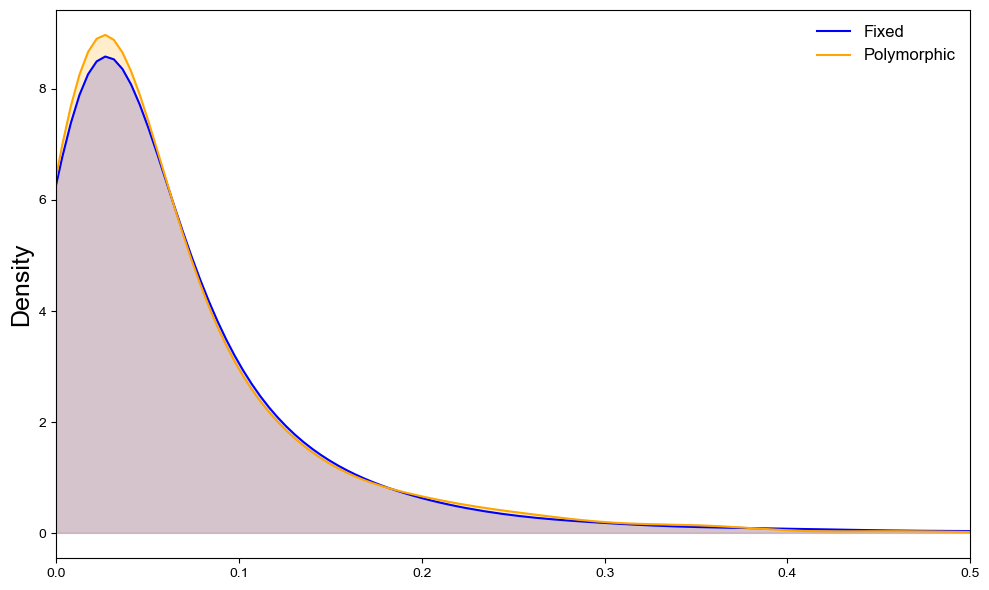

In [103]:
vvv = prepare_alpha(v2[v2["SpecSup447"] > 250], vv2[vv2["SpecSup447"] > 250], stat = "abs logfc")
compute_alpha_cutoff(vvv, cutoff = 0.08, plot = True, window = [0, 0.5])

In [106]:
v2 = v2[(v2["allele1_pred_counts"] > 750) | (v2["allele2_pred_counts"] > 750)]
vv2 = vv2[(vv2["allele1_pred_counts"] > 750) | (vv2["allele2_pred_counts"] > 750)]

v2[v2["logfc"] > 0.25].shape

(108, 14)

In [72]:
from scipy.stats import binomtest
binomtest(134, 108 + 134)

BinomTestResult(k=134, n=242, alternative='two-sided', statistic=0.5537190082644629, pvalue=0.1078488647252276)

In [84]:
fisher_exact([[524, 559], [168, 129]])

SignificanceResult(statistic=0.7197802197802198, pvalue=0.01286854179252456)

In [112]:
v2 = v2[(v2["abs logfc"] > 0.25) | (v2["PhyloP447"] > 2)]

In [117]:
v2_more = v2[(v2["abs logfc"] > 0.25) & (v2["PhyloP447"] > 2)]

In [118]:
v2_more

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF
1853321,chr12:45644509,chr12:45644509,ARID2,85196,3.295,1.000,414,0.586193,532.13240,798.87950,0.586193,Fixed,.,.
1860144,chr12:47900930,chr12:47900930,VDR,4078,4.365,1.000,445,0.314695,5703.58900,7093.83000,0.314695,Fixed,.,.
1860145,chr12:47900931,chr12:47900931,VDR,4076,3.121,1.000,445,0.377617,5700.30270,7405.79800,0.377617,Fixed,.,.
3401909,chr17:886421,chr17:886421,NXN,93316,3.904,1.000,353,-0.600994,1921.73560,1266.99900,0.600994,Fixed,.,.
3402106,chr17:929048,chr17:929048,NXN,50688,2.598,1.000,427,-0.409701,1720.74320,1295.33960,0.409701,Fixed,.,.
3402125,chr17:933588,chr17:933588,NXN,46148,5.881,0.997,343,-0.281901,1517.45600,1248.11770,0.281901,Fixed,.,.
3434567,chr17:10614738,chr17:10614738,MYH3,24641,3.078,1.000,444,1.186273,1315.15730,2992.82520,1.186273,Fixed,.,.
4111102,chr2:5756318,chr2:5756318,SOX11,63934,2.884,0.001,257,-0.557574,1100.26880,747.57080,0.557574,Fixed,.,.
4111136,chr2:5761420,chr2:5761420,SOX11,69036,2.629,0.003,325,0.728354,1016.23770,1683.64950,0.728354,Fixed,.,.
4111898,chr2:5915483,chr2:5915483,SOX11,223099,5.085,0.972,337,-0.792355,14485.46500,8363.92100,0.792355,Fixed,.,.
